In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from scipy.ndimage.filters import gaussian_filter

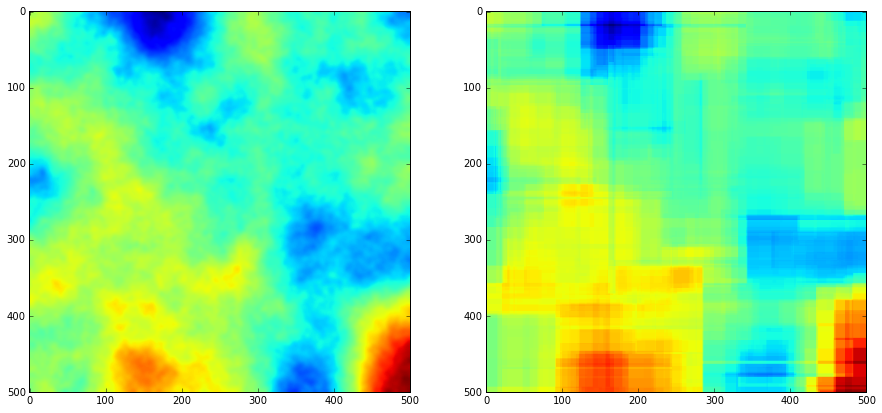

In [2]:
from sklearn.ensemble import RandomForestRegressor

def scaling_noise(shape):
    S = np.zeros(shape)
    i = np.max(shape) / 8
    while i >= 3:
        noise = gaussian_filter(np.random.normal(size=shape),i)
        S += noise * (i+1)**2
        i /= 2
    return S

n = 500
noise = scaling_noise((n,n))

def learn_gray_image(img, regressor, n_samples=500):
    h, w = img.shape
    I, J = np.mgrid[0:h,0:w]
    
    Xy = np.dstack((I,J,img)).reshape(-1,3)

    samples = np.random.choice(Xy.shape[0],n_samples)

    X_train = Xy[samples,0:2]
    y_train = Xy[samples,2]

    regressor.fit(X_train, y_train)

    return regressor.predict(Xy[:,0:2]).reshape(img.shape)
    
p = learn_gray_image(noise, RandomForestRegressor())

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,15))

ax1.imshow(noise)
ax2.imshow(p)

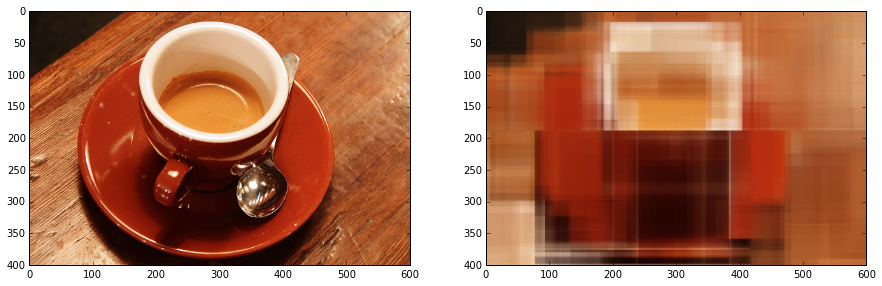

In [3]:
from skimage.data import coffee

L = coffee()

def learn_color_image(img, regressor, n_samples=500):
    h, w, _ = L.shape
    I, J = np.mgrid[0:h,0:w]

    Xy = np.dstack((I,J,L)).reshape(-1,5)
    X = Xy[:,0:2]
    y = Xy[:,2:]

    n_samples = 500

    samples = np.random.choice(Xy.shape[0],n_samples)

    X_train = Xy[samples,0:2]
    y_train = Xy[samples,2:]

    regressor.fit(X_train, y_train)

    return regressor.predict(X).reshape(L.shape)

R = learn_color_image(L, RandomForestRegressor(n_estimators=100,max_depth=10))

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,15))

ax1.imshow(L)
ax2.imshow(R/255.)